In [61]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sbr
import numpy as np
import os
import warnings

In [62]:
#load dataset
d2015=pd.read_csv("./dataset/2015.csv")
d2016=pd.read_csv("./dataset/2016.csv")
d2017=pd.read_csv("./dataset/2017.csv")
d2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [63]:
#Unifying data
d2015.drop(columns="Standard Error", inplace=True, errors="ignore")
d2016.drop(columns="Lower Confidence Interval",inplace=True,errors="ignore")
d2016.drop(columns="Upper Confidence Interval",inplace=True,errors="ignore")
del d2017["Whisker.high"]
del d2017["Whisker.low"]

In [64]:
columns_names={"Happiness Rank":"Rank","Happiness Score":"Score","Economy (GDP per Capita)":"Economy","Health (Life Expectancy)":"Health","Trust (Government Corruption)":"Trust","Dystopia Residual":"Dystopia_Residual"}
d2015=d2015.rename(columns=columns_names)
d2016=d2016.rename(columns=columns_names)
columns_names["Economy..GDP.per.Capita."] = "Economy"
columns_names["Health..Life.Expectancy."] = "Health"
columns_names["Trust..Government.Corruption."]="Trust"
columns_names["Dystopia.Residual"] = "Dystopia_Residual"
columns_names["Happiness.Rank"] = "Rank"
columns_names["Happiness.Score"] = "Score"
d2017=d2017.rename(columns=columns_names)

d2015.head()

,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [65]:
#delete different countries in 2015
d2015.drop(d2015.index[147],inplace=True)
d2015.drop(d2015.index[139],inplace=True)
d2015.drop(d2015.index[125],inplace=True)
d2015.drop(d2015.index[100],inplace=True)
d2015.drop(d2015.index[98],inplace=True)
d2015.drop(d2015.index[96],inplace=True)
d2015.drop(d2015.index[93],inplace=True)
d2015.drop(d2015.index[39],inplace=True)
d2015.drop(d2015.index[21],inplace=True)
#delete different countries in 2016
d2016.drop(d2016.index[142],inplace=True)
d2016.drop(d2016.index[137],inplace=True)
d2016.drop(d2016.index[112],inplace=True)
d2016.drop(d2016.index[101],inplace=True)
d2016.drop(d2016.index[75],inplace=True)
d2016.drop(d2016.index[51],inplace=True)
d2016.drop(d2016.index[39],inplace=True)
d2016.drop(d2016.index[14],inplace=True)
#delete different countries in 2017
d2017.drop(d2017.index[154],inplace=True)
d2017.drop(d2017.index[146],inplace=True)
d2017.drop(d2017.index[138],inplace=True)
d2017.drop(d2017.index[112],inplace=True)
d2017.drop(d2017.index[110],inplace=True)
d2017.drop(d2017.index[49],inplace=True)

In [66]:
new_d2015=d2015.sort_values(by="Country").copy()
new_d2016=d2016.sort_values(by="Country").copy()
new_d2017=d2017.sort_values(by="Country").copy()

In [67]:
new_d2015.index=range(len(new_d2015))
new_d2016.index=range(len(new_d2016))
new_d2017.index=range(len(new_d2017))
new_d2017.head(3)

,Country,Rank,Score,Economy,Family,Health,Freedom,Generosity,Trust,Dystopia_Residual
0,Afghanistan,141,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
1,Albania,109,4.644,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
2,Algeria,53,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604


In [68]:
uni_data=pd.DataFrame()
uni_data["Country"]=new_d2015.Country
uni_data["Region"]=new_d2015.Region
uni_data["Rank"]=new_d2015.Rank
uni_data["Score"]=new_d2015.Score+new_d2016.Score+new_d2017.Score
uni_data["Economy"]=new_d2015.Economy+new_d2016.Economy+new_d2017.Economy
uni_data["Family"]=new_d2015.Family+new_d2016.Family+new_d2017.Family
uni_data["Health"]=new_d2015.Health+new_d2016.Health+new_d2017.Health
uni_data["Freedom"]=new_d2015.Freedom+new_d2016.Freedom+new_d2017.Freedom
uni_data["Trust"]=new_d2015.Trust+new_d2016.Trust+new_d2017.Trust
uni_data["Generosity"]=new_d2015.Generosity+new_d2016.Generosity+new_d2017.Generosity
uni_data["Dystopia_Residual"]=new_d2015["Dystopia_Residual"]+new_d2016["Dystopia_Residual"]+new_d2017["Dystopia_Residual"]
uni_data.head(10)

,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Afghanistan,Southern Asia,153,10.729,1.103567,0.994763,0.657537,0.504620,0.229468,0.989651,6.248481
1,Albania,Central and Eastern Europe,95,14.258,2.830163,2.109655,2.274480,1.057489,0.157004,0.512433,5.317542
2,Algeria,Middle East and Northern Africa,68,17.832,3.083814,3.057027,1.853285,0.729186,0.481496,0.218097,8.408734
3,Angola,Sub-Saharan Africa,137,11.694,2.463518,2.628472,0.266609,0.109730,0.225280,0.342076,5.658462
4,Argentina,Latin America and Caribbean,30,19.823,3.390175,3.754801,2.179477,1.367099,0.217540,0.333857,8.579855
5,Armenia,Central and Eastern Europe,127,13.086,2.529667,2.409364,2.008254,0.537143,0.101834,0.239968,5.258869
6,Australia,Australia and New Zealand,10,21.881,4.262425,3.924032,2.626647,1.821217,0.980864,1.387389,6.878171
7,Austria,Western Europe,13,21.325,4.274707,3.840815,2.511398,1.735646,0.621300,0.976002,7.365136
8,Azerbaijan,Central and Eastern Europe,80,15.737,3.301222,2.850750,1.726266,1.121726,0.520778,0.179659,6.036712
9,Bahrain,Middle East and Northern Africa,49,18.265,4.252412,3.483320,2.057253,1.465417,0.820762,0.517758,5.668169


In [69]:
uni_data.tail()

,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
144,Venezuela,Latin America and Caribbean,23,18.144,3.306341,3.720318,1.956704,0.781547,0.258221,0.165930,7.955454
145,Vietnam,Southeastern Asia,75,15.495,2.161078,2.980921,2.060499,1.725036,0.307603,0.654318,5.605849
146,Yemen,Middle East and Northern Africa,136,11.394,1.717563,2.091242,1.021201,0.833874,0.194227,0.293645,5.241681
147,Zambia,Sub-Saharan Africa,85,14.438,1.718807,2.556907,0.792806,1.376493,0.317684,0.624150,7.050915
148,Zimbabwe,Sub-Saharan Africa,115,12.678,0.997257,2.830636,0.691014,0.849284,0.261985,0.564043,6.482580


In [70]:
uni_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 11 columns):
Country              149 non-null object
Region               149 non-null object
Rank                 149 non-null int64
Score                149 non-null float64
Economy              149 non-null float64
Family               149 non-null float64
Health               149 non-null float64
Freedom              149 non-null float64
Trust                149 non-null float64
Generosity           149 non-null float64
Dystopia_Residual    149 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 12.9+ KB


In [71]:
uni_data.describe()

,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,78.476510,16.190544,2.836013,3.009261,1.781918,1.205195,0.401336,0.729340,6.227462
std,45.897739,3.379636,1.213776,0.789234,0.684987,0.437154,0.335749,0.395929,1.522174
min,1.000000,8.715000,0.148712,0.571833,0.005565,0.109730,0.002270,0.000000,2.007279
25%,39.000000,13.291000,2.010474,2.571474,1.319768,0.889956,0.170427,0.465850,5.339054
50%,77.000000,15.975000,3.019552,3.155169,1.927722,1.270697,0.294008,0.660163,6.205401
75%,118.000000,18.639000,3.774034,3.664053,2.274480,1.513357,0.491117,0.964006,7.152600
max,158.000000,22.590000,5.385456,4.196064,2.921932,1.924939,1.512340,2.453665,9.998355


In [72]:
uni_data.corr()

,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
Rank,1.000000,-0.982955,-0.781937,-0.740618,-0.757356,-0.552634,-0.399023,-0.155817,-0.546878
Score,-0.982955,1.000000,0.800879,0.757408,0.771700,0.581934,0.424035,0.173789,0.535856
Economy,-0.781937,0.800879,1.000000,0.662358,0.830249,0.381033,0.343290,-0.017583,0.083179
Family,-0.740618,0.757408,0.662358,1.000000,0.569332,0.479570,0.236795,0.090044,0.165450
Health,-0.757356,0.771700,0.830249,0.569332,1.000000,0.374536,0.280389,0.079323,0.116144
Freedom,-0.552634,0.581934,0.381033,0.479570,0.374536,1.000000,0.513230,0.374726,0.073191
Trust,-0.399023,0.424035,0.343290,0.236795,0.280389,0.513230,1.000000,0.294371,-0.025714
Generosity,-0.155817,0.173789,-0.017583,0.090044,0.079323,0.374726,0.294371,1.000000,-0.115175
Dystopia_Residual,-0.546878,0.535856,0.083179,0.165450,0.116144,0.073191,-0.025714,-0.115175,1.000000


In [73]:
#Top 5 economy
uni_data.sort_values(by="Economy",ascending=False).head()

,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
108,Qatar,Middle East and Northern Africa,28,19.361,5.385456,3.232537,2.224658,1.811321,1.441869,0.980084,4.284444
77,Luxembourg,Western Europe,17,20.680,5.003374,3.717204,2.609449,1.761158,1.050104,0.839231,5.699672
116,Singapore,Southeastern Asia,24,20.109,4.859688,3.241394,2.921932,1.580061,1.426278,0.984076,5.095122
70,Kuwait,Middle East and Northern Africa,39,18.639,4.804312,3.303219,1.992716,1.482988,0.707940,0.550220,5.797615
99,Norway,Western Europe,4,22.557,4.652903,3.991374,2.477667,1.901243,1.038754,1.087952,7.406987


In [74]:
#Top low economy
uni_data.sort_values(by="Economy").head()

,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
30,Congo (Kinshasa),Sub-Saharan Africa,120,13.069,0.148712,3.036983,0.477467,0.618031,0.197241,0.749376,7.841319
21,Burundi,Sub-Saharan Africa,157,8.715,0.175233,1.280084,0.533041,0.221601,0.278958,0.604605,5.620084
74,Liberia,Sub-Saharan Africa,116,11.726,0.297302,2.165328,0.803578,0.875671,0.149788,0.750800,6.683416
80,Malawi,Sub-Saharan Africa,131,12.418,0.336572,1.070909,0.834350,1.311755,0.218122,0.928130,7.718286
96,Niger,Sub-Saharan Africa,144,11.729,0.364025,2.370975,0.827195,1.220989,0.466723,0.632244,5.847443


In [75]:
#Top score
uni_data.sort_values(by="Score",ascending=False).head()

,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
126,Switzerland,Western Europe,1,22.590,4.488820,4.011662,2.662591,1.871211,1.198817,0.868159,7.488726
35,Denmark,Western Europe,3,22.575,4.249643,4.075442,2.462246,1.854797,1.328870,1.058380,7.545137
55,Iceland,Western Europe,2,22.566,4.209613,4.196064,2.648722,1.822173,0.444727,1.388620,7.856095
99,Norway,Western Europe,4,22.557,4.652903,3.991374,2.477667,1.901243,1.038754,1.087952,7.406987
42,Finland,Western Europe,6,22.288,4.139802,3.993147,2.509178,1.830681,1.206372,0.733913,7.875692


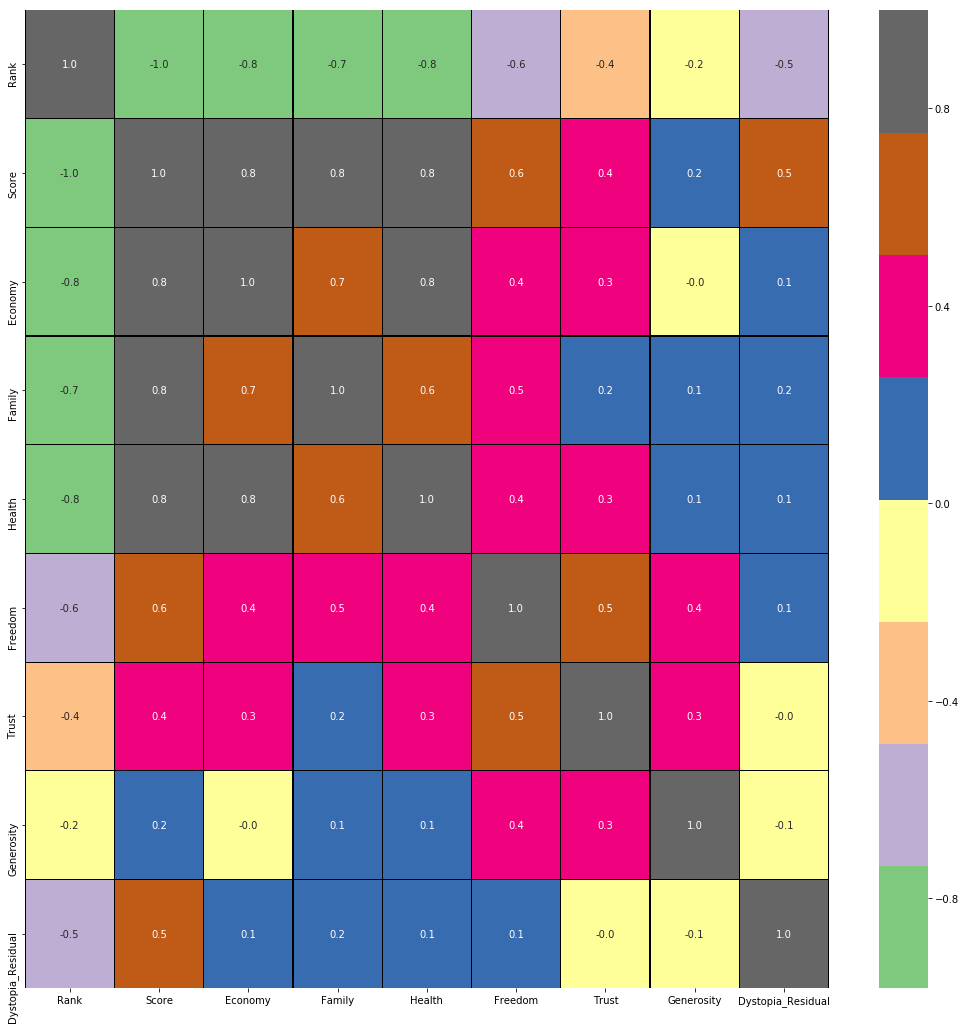

In [79]:
f,ax=plt.subplots(figsize=(18,18))
sbr.heatmap(uni_data.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="Accent",ax=ax,linecolor="black")
plt.show()

In [99]:
melted=pd.melt(frame=uni_data,id_vars="Country",value_vars=["Region"])
melted['value'].value_counts()

Sub-Saharan Africa                 34
Central and Eastern Europe         29
Western Europe                     21
Latin America and Caribbean        21
Middle East and Northern Africa    19
Southeastern Asia                   8
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: value, dtype: int64

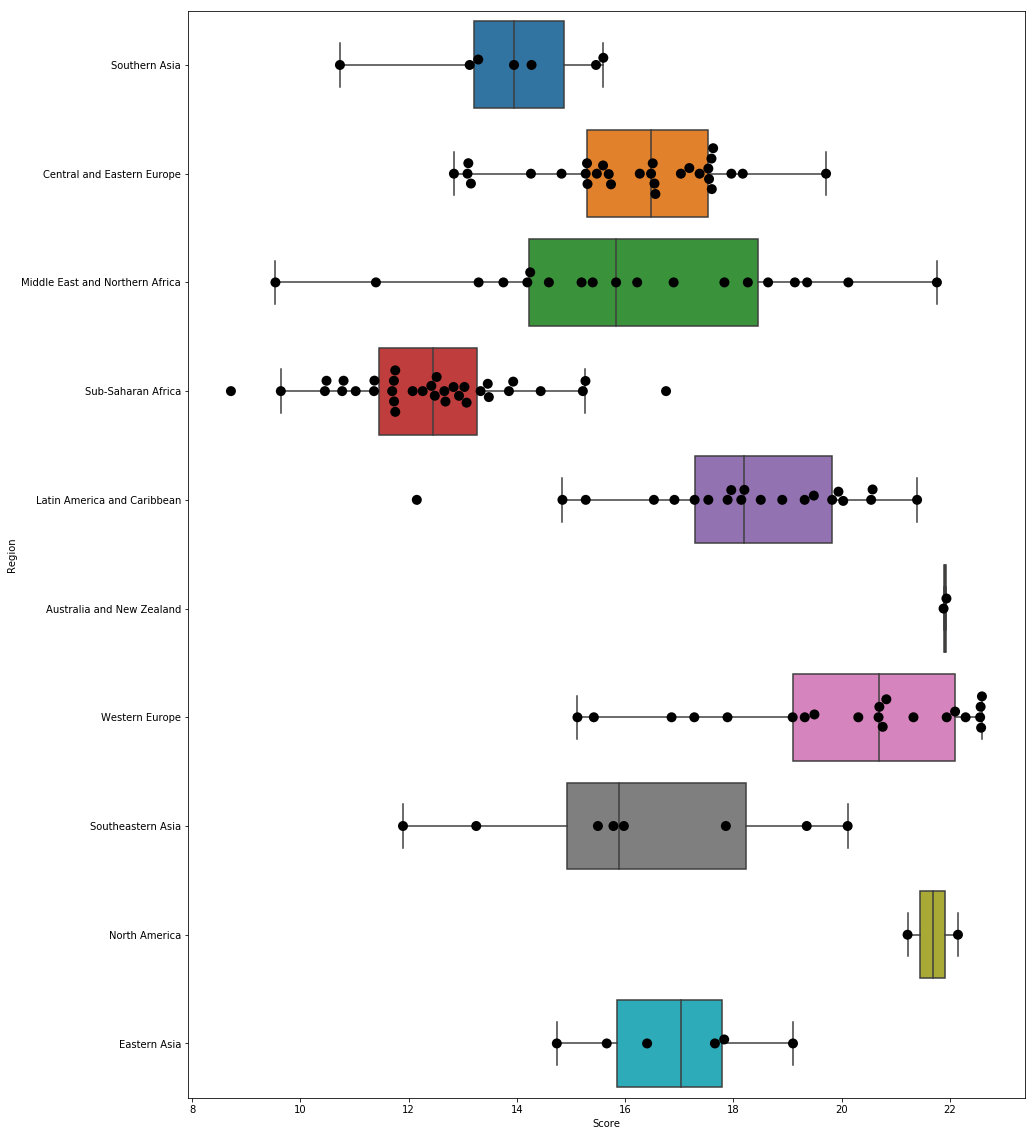

In [92]:
#Score Level according to Region
f,ax=plt.subplots(figsize=(15,20))
sbr.boxplot(x=uni_data.Score,y=uni_data.Region,data=uni_data)
sbr.swarmplot(x=uni_data.Score,y=uni_data.Region,data=uni_data,color="k",size=10)
warnings.filterwarnings("ignore")

In [100]:
uni_data.set_index("Rank").sort_values(by="Rank",ascending="False").head(10)

,Country,Region,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
Rank,,,,,,,,,,
1,Switzerland,Western Europe,22.590,4.488820,4.011662,2.662591,1.871211,1.198817,0.868159,7.488726
2,Iceland,Western Europe,22.566,4.209613,4.196064,2.648722,1.822173,0.444727,1.388620,7.856095
3,Denmark,Western Europe,22.575,4.249643,4.075442,2.462246,1.854797,1.328870,1.058380,7.545137
4,Norway,Western Europe,22.557,4.652903,3.991374,2.477667,1.901243,1.038754,1.087952,7.406987
5,Canada,North America,22.147,4.245644,3.900059,2.567788,1.817771,0.930232,1.341990,7.343874
6,Finland,Western Europe,22.288,4.139802,3.993147,2.509178,1.830681,1.206372,0.733913,7.875692
7,Netherlands,Western Europe,22.094,4.298065,3.738229,2.515846,1.753254,0.900072,1.420750,7.467994
8,Sweden,Western Europe,21.939,4.277907,3.854872,2.572955,1.854904,1.231509,1.130559,7.016068
9,New Zealand,Australia and New Zealand,21.934,4.016546,4.040645,2.556090,1.834912,1.231077,1.469025,6.786236


In [101]:
uni_data[["Country","Economy","Trust"]]

,Country,Economy,Trust
0,Afghanistan,1.103567,0.229468
1,Albania,2.830163,0.157004
2,Algeria,3.083814,0.481496
3,Angola,2.463518,0.225280
4,Argentina,3.390175,0.217540
5,Armenia,2.529667,0.101834
6,Australia,4.262425,0.980864
7,Austria,4.274707,0.621300
8,Azerbaijan,3.301222,0.520778
9,Bahrain,4.252412,0.820762


In [102]:
stdscore=uni_data.Score.std()
scoremean=sum(uni_data.Score)/len(uni_data.Score)
print("Score Average: ",scoremean)
print("Score Standart Deviation: ",stdscore)

Score Average:  16.19054362399466
Score Standart Deviation:  3.3796355618065026


In [103]:
stdeco=uni_data["Economy"].std()
ecomean=sum(uni_data.Economy)/len(uni_data.Economy)
print("Economy Average: " ,ecomean)
print("Economy Standard Deviation: ",stdeco)

Economy Average:  2.8360125244112746
Economy Standard Deviation:  1.213776015659055


In [104]:
stdhealth=uni_data["Health"].std()
healthmean=sum(uni_data.Health)/len(uni_data.Health)
print("Health Average: ",healthmean)
print("Health Standart Deviation: ",stdhealth)

Health Average:  1.7819183530356675
Health Standart Deviation:  0.684987330153155


In [105]:
stdfamily=uni_data["Family"].std()
familymean=sum(uni_data.Family)/len(uni_data.Family)
print("Family Average: ",familymean)
print("Family Standart Deviation: ",stdfamily)

Family Average:  3.0092612307745665
Family Standart Deviation:  0.7892338172377431


In [106]:
datamean=pd.DataFrame()
datamean["Country"]=uni_data.Country
datamean["Region"]=uni_data.Region
datamean["Score"]=uni_data.Score
datamean["Score_Level"]=["High" if i>scoremean+stdscore else "Normal" if (scoremean-stdscore)<i<(scoremean+stdscore) else "Low" for i in uni_data.Score]
datamean["Economy"]=uni_data.Economy
datamean["Economic_Level"]=["High" if i>ecomean+stdeco else "Normal" if (ecomean-stdeco)<i<(ecomean+stdeco) else "Low" for i in uni_data.Economy]
datamean["Health"]=uni_data.Health
datamean["Health_Level"]=["High" if i>healthmean+stdhealth else "Normal" if (healthmean-stdhealth)<i<(healthmean+stdhealth) else "Low" for i in uni_data.Health]
datamean["Family"]=uni_data.Family
datamean["Family_Level"]=["High" if i>familymean+stdfamily else "Normal" if (familymean-stdfamily)<i<(familymean+stdfamily) else "Low" for i in uni_data.Family]
datamean.head(10)

,Country,Region,Score,Score_Level,Economy,Economic_Level,Health,Health_Level,Family,Family_Level
0,Afghanistan,Southern Asia,10.729,Low,1.103567,Low,0.657537,Low,0.994763,Low
1,Albania,Central and Eastern Europe,14.258,Normal,2.830163,Normal,2.274480,Normal,2.109655,Low
2,Algeria,Middle East and Northern Africa,17.832,Normal,3.083814,Normal,1.853285,Normal,3.057027,Normal
3,Angola,Sub-Saharan Africa,11.694,Low,2.463518,Normal,0.266609,Low,2.628472,Normal
4,Argentina,Latin America and Caribbean,19.823,High,3.390175,Normal,2.179477,Normal,3.754801,Normal
5,Armenia,Central and Eastern Europe,13.086,Normal,2.529667,Normal,2.008254,Normal,2.409364,Normal
6,Australia,Australia and New Zealand,21.881,High,4.262425,High,2.626647,High,3.924032,High
7,Austria,Western Europe,21.325,High,4.274707,High,2.511398,High,3.840815,High
8,Azerbaijan,Central and Eastern Europe,15.737,Normal,3.301222,Normal,1.726266,Normal,2.850750,Normal
9,Bahrain,Middle East and Northern Africa,18.265,Normal,4.252412,High,2.057253,Normal,3.483320,Normal


In [107]:
datamean.tail(10)

,Country,Region,Score,Score_Level,Economy,Economic_Level,Health,Health_Level,Family,Family_Level
139,United Arab Emirates,Middle East and Northern Africa,20.122,High,4.627133,High,2.265978,Normal,3.263300,Normal
140,United Kingdom,Western Europe,20.306,High,4.110834,High,2.524676,High,3.868660,High
141,United States,North America,21.216,High,4.448729,High,2.415077,Normal,3.714851,Normal
142,Uruguay,Latin America and Caribbean,19.484,Normal,3.460790,Normal,2.252647,Normal,3.652558,Normal
143,Uzbekistan,Central and Eastern Europe,17.961,Normal,2.154791,Normal,1.597623,Normal,4.057499,High
144,Venezuela,Latin America and Caribbean,18.144,Normal,3.306341,Normal,1.956704,Normal,3.720318,Normal
145,Vietnam,Southeastern Asia,15.495,Normal,2.161078,Normal,2.060499,Normal,2.980921,Normal
146,Yemen,Middle East and Northern Africa,11.394,Low,1.717563,Normal,1.021201,Low,2.091242,Low
147,Zambia,Sub-Saharan Africa,14.438,Normal,1.718807,Normal,0.792806,Low,2.556907,Normal
148,Zimbabwe,Sub-Saharan Africa,12.678,Low,0.997257,Low,0.691014,Low,2.830636,Normal


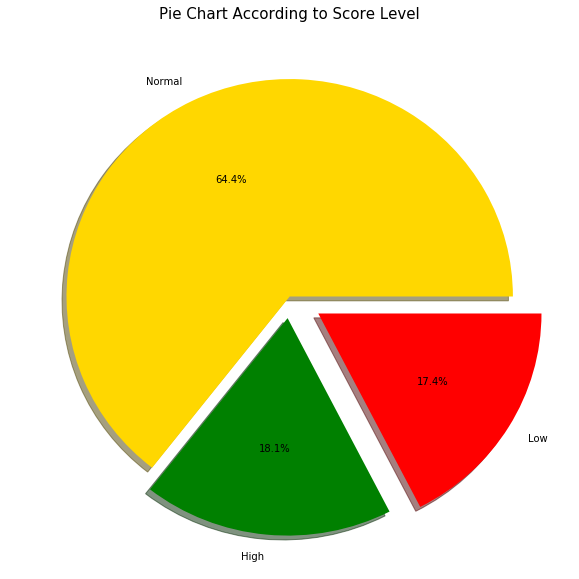

In [118]:
labels=datamean.Score_Level.value_counts().index
explode=[0,0.1,0.15]
sizes=datamean.Score_Level.value_counts().values

plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart According to Score Level",color="Black",fontsize=15)
warnings.filterwarnings("ignore")

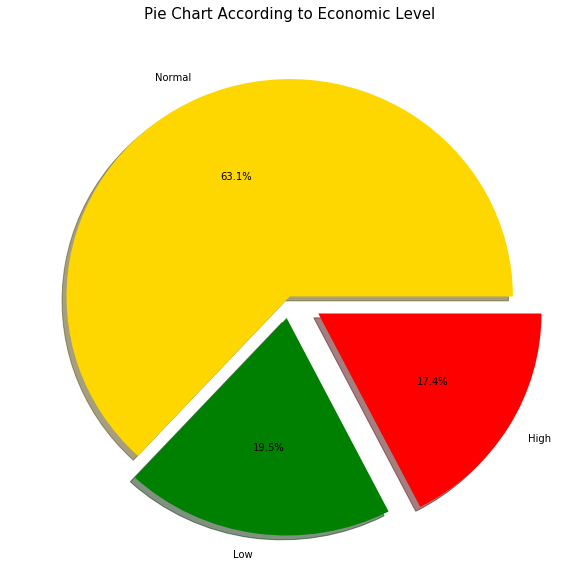

In [119]:
labels=datamean.Economic_Level.value_counts().index
explode=[0,0.1,0.15]
sizes=datamean.Economic_Level.value_counts().values

plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart According to Economic Level",color="Black",fontsize=15)
warnings.filterwarnings("ignore")

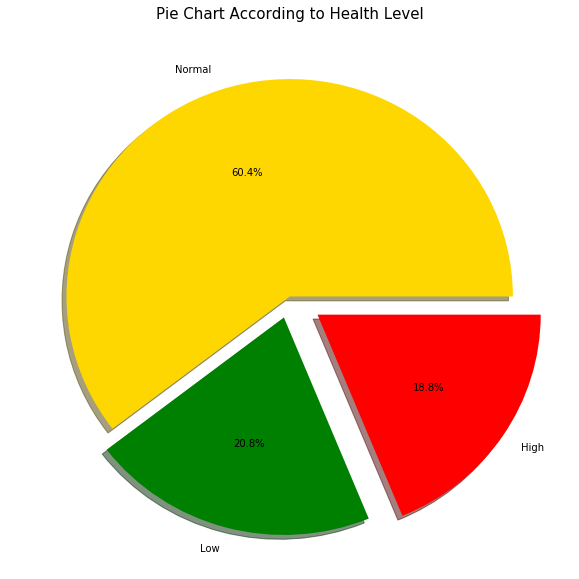

In [116]:
labels=datamean.Health_Level.value_counts().index
explode=[0,0.1,0.15]
sizes=datamean.Health_Level.value_counts().values

plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,shadow=True,autopct="%1.1f%%")
plt.title("Pie Chart According to Health Level",color="Black",fontsize=15)
warnings.filterwarnings("ignore")

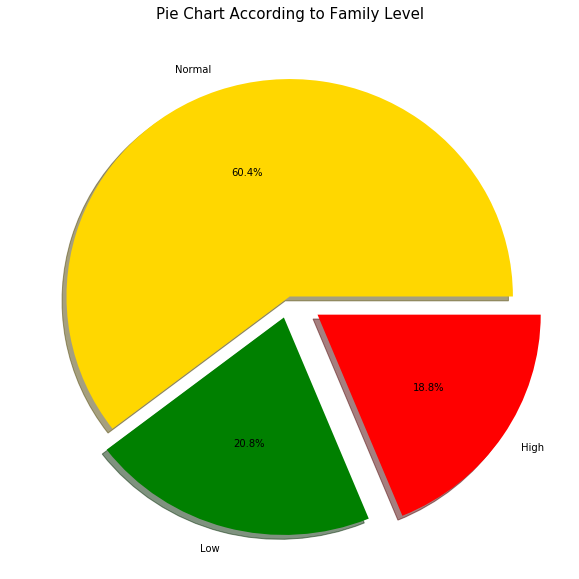

In [115]:
labels=datamean.Family_Level.value_counts().index
explode=[0,0.1,0.15]
sizes=datamean.Health_Level.value_counts().values

plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,shadow=True,autopct="%1.1f%%")
plt.title("Pie Chart According to Family Level",color="Black",fontsize=15)
warnings.filterwarnings("ignore")

In [120]:
datamean.head()


,Country,Region,Score,Score_Level,Economy,Economic_Level,Health,Health_Level,Family,Family_Level
0,Afghanistan,Southern Asia,10.729,Low,1.103567,Low,0.657537,Low,0.994763,Low
1,Albania,Central and Eastern Europe,14.258,Normal,2.830163,Normal,2.274480,Normal,2.109655,Low
2,Algeria,Middle East and Northern Africa,17.832,Normal,3.083814,Normal,1.853285,Normal,3.057027,Normal
3,Angola,Sub-Saharan Africa,11.694,Low,2.463518,Normal,0.266609,Low,2.628472,Normal
4,Argentina,Latin America and Caribbean,19.823,High,3.390175,Normal,2.179477,Normal,3.754801,Normal


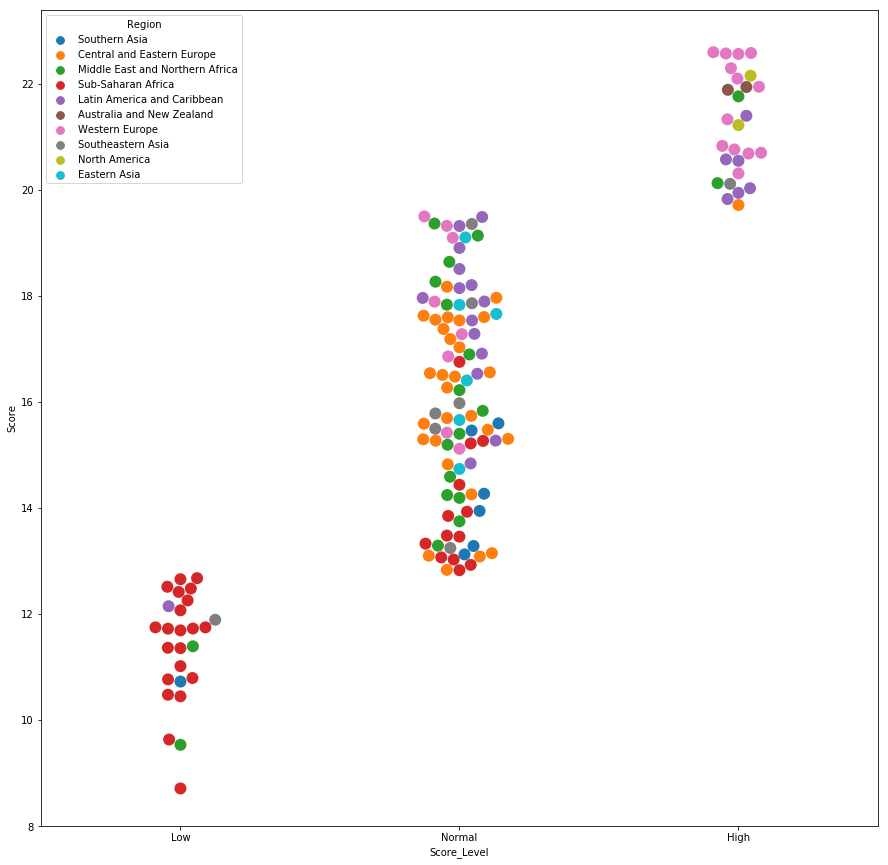

In [121]:
#Swarm plot for Score level
f,ax=plt.subplots(figsize=(15,15))
sbr.swarmplot(x=datamean.Score_Level,y=datamean.Score,hue=datamean.Region,size=12)
warnings.filterwarnings("ignore")

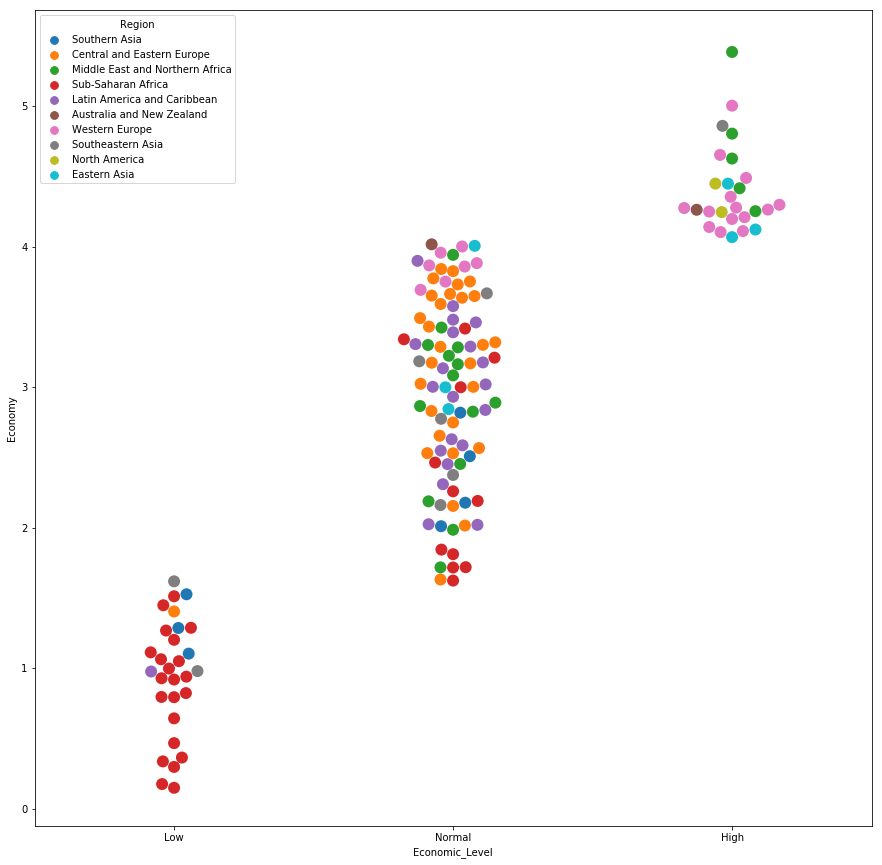

In [122]:
#Swarm plot for Economic level
f,ax=plt.subplots(figsize=(15,15))
sbr.swarmplot(x=datamean.Economic_Level,y=datamean.Economy,hue=datamean.Region,size=12)
warnings.filterwarnings("ignore")

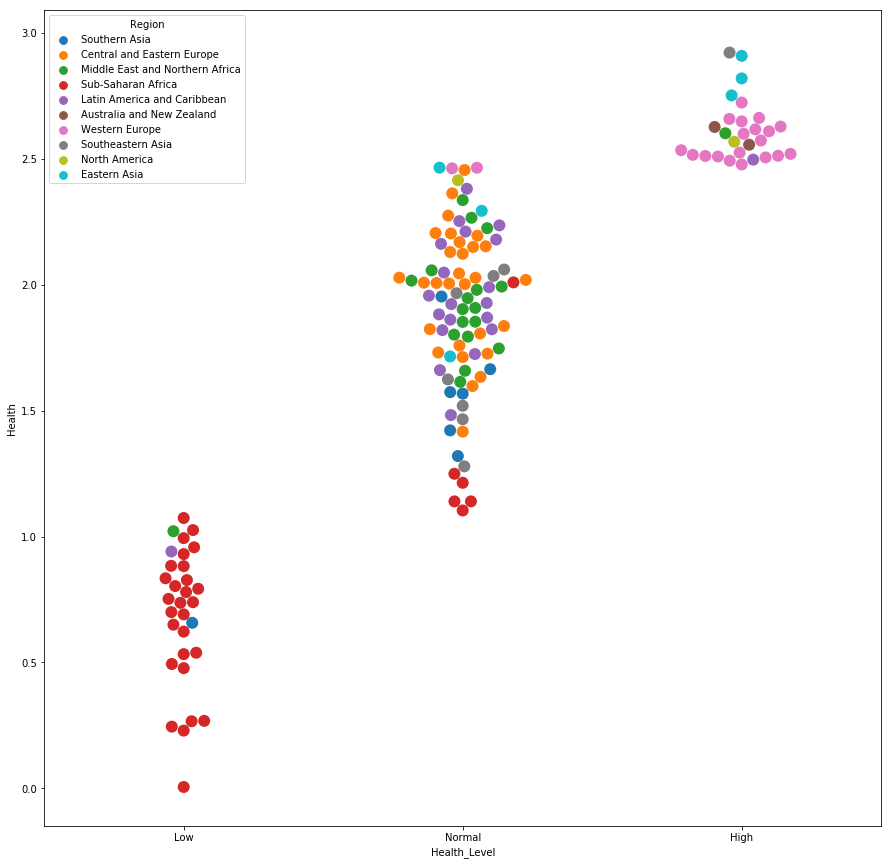

In [123]:
#swarmplot for health leve
f,ax=plt.subplots(figsize=(15,15))
sbr.swarmplot(x=datamean["Health_Level"],y=datamean.Health,hue=datamean.Region,size=12)
warnings.filterwarnings("ignore")

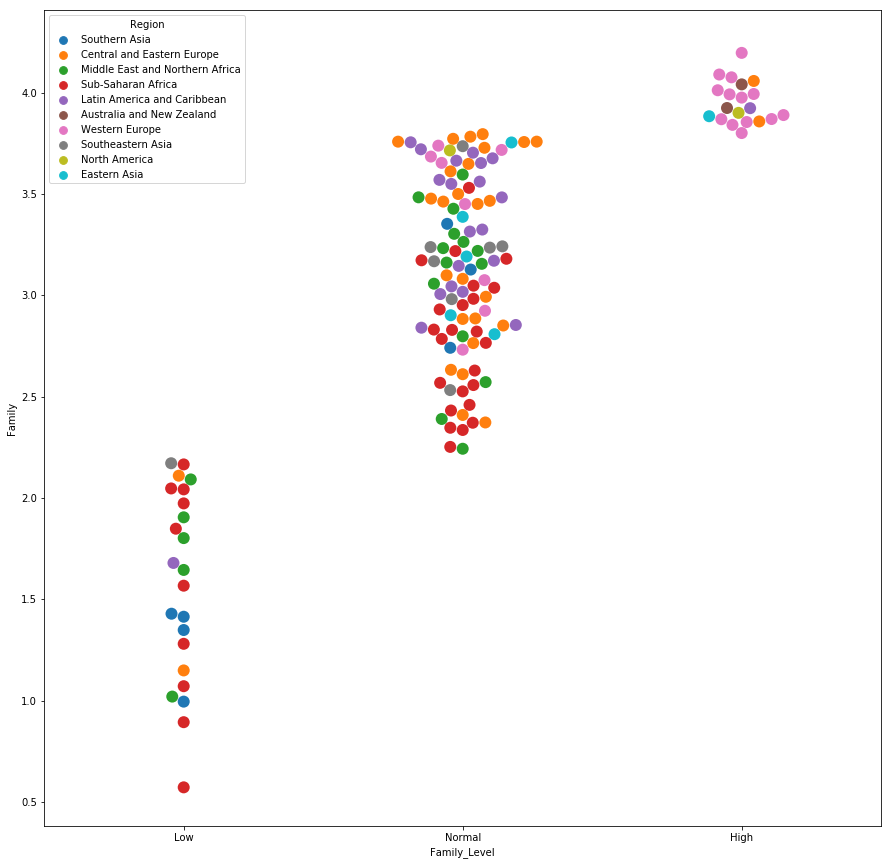

In [124]:
#swarmplot for family level
f,ax=plt.subplots(figsize=(15,15))
sbr.swarmplot(x=datamean["Family_Level"],y=datamean.Family,hue=datamean.Region,size=12)
warnings.filterwarnings("ignore")

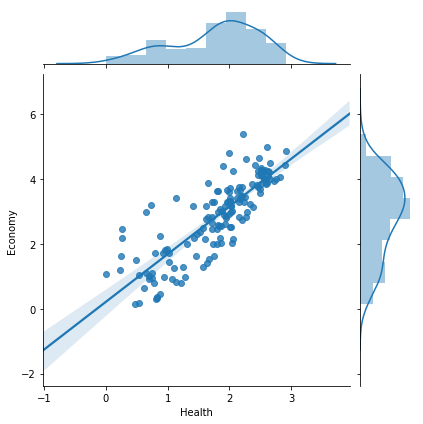

In [131]:
sbr.jointplot(x=datamean.Health,y=datamean.Economy,data=datamean,kind="reg")
warnings.filterwarnings("ignore")

In [132]:
grpdata=datamean.set_index(["Score_Level","Economic_Level","Health_Level","Family_Level"])
grpdata.loc["High","High","High","High"]

Country  \
Score_Level Economic_Level Health_Level Family_Level                   
High        High           High         High               Australia   
                                        High                 Austria   
                                        High                 Belgium   
                                        High                  Canada   
                                        High                 Finland   
                                        High                 Germany   
                                        High                 Iceland   
                                        High                 Ireland   
                                        High                  Norway   
                                        High                  Sweden   
                                        High             Switzerland   
                                        High          United Kingdom   

                                                                         Region  \
Score_Level Economic_Level Health_Level Family_Level                              
High        High           High         High          Australia and New Zealand   
                                        High                     Western Europe   
                                        High                     Western Europe   
                                        High                      North America   
                                        High                     Western Europe   
                                        High                     Western Europe   
                                        High                     Western Europe   
                                        High                     Western Europe   
                                        High                     Western Europe   
                                        High                     Western Europe   
                                        High                     Western Europe   
                                        High                     Western Europe   

                                                       Score   Economy  \
Score_Level Economic_Level Health_Level Family_Level                     
High        High           High         High          21.881  4.262425   
                                        High          21.325  4.274707   
                                        High          20.757  4.196991   
                                        High          22.147  4.245644   
                                        High          22.288  4.139802   
                                        High          20.695  4.263713   
                                        High          22.566  4.209613   
                                        High          20.824  4.355077   
                                        High          22.557  4.652903   
                                        High          21.939  4.277907   
                                        High          22.590  4.488820   
                                        High          20.306  4.110834   

                                                        Health    Family  
Score_Level Economic_Level Health_Level Family_Level                      
High        High           High         High          2.626647  3.924032  
                                        High          2.511398  3.840815  
                                        High          2.534352  3.800463  
                                        High          2.567788  3.900059  
                                        High          2.509178  3.993147  
                                        High          2.505681  3.869630  
                                        High          2.648722  4.196064  
                                        High          2.519663  4.089281  
                                        High          2.477667  3.991374  
                           

In [133]:
grpdata.loc["Normal","Normal","Normal","Normal"]

Country  \
Score_Level Economic_Level Health_Level Family_Level                            
Normal      Normal         Normal       Normal                        Algeria   
                                        Normal                        Armenia   
                                        Normal                     Azerbaijan   
                                        Normal                        Belarus   
                                        Normal                         Bhutan   
                                        Normal                        Bolivia   
                                        Normal         Bosnia and Herzegovina   
                                        Normal                       Bulgaria   
                                        Normal                          China   
                                        Normal                       Colombia   
                                        Normal                        Croatia   
                                        Normal             Dominican Republic   
                                        Normal                        Ecuador   
                                        Normal                          Egypt   
                                        Normal                    El Salvador   
                                        Normal                        Estonia   
                                        Normal                      Guatemala   
                                        Normal                       Honduras   
                                        Normal                        Hungary   
                                        Normal                      Indonesia   
                                        Normal                           Iraq   
                                        Normal                        Jamaica   
                                        Normal                         Jordan   
                                        Normal                     Kazakhstan   
                                        Normal                         Kosovo   
                                        Normal                     Kyrgyzstan   
                                        Normal                         Latvia   
                                        Normal                        Lebanon   
                                        Normal                          Libya   
                                        Normal                      Lithuania   
                                        Normal                      Macedonia   
                                        Normal                       Malaysia   
                                        Normal                      Mauritius   
                                        Normal                        Moldova   
                                        Normal                     Montenegro   
                                        Normal                      Nicaragua   
                                        Normal        Palestinian Territories   
                                        Normal                           Peru   
                                        Normal                    Philippines   
                                        Normal                         Poland   
                                        Normal                       Portugal   
                                        Normal                        Romania   
                                        Normal                         Russia   
                                        Normal                         Serbia   
                                        Normal                       Slovenia   
                                        Normal                      Sri Lanka   
                                        Normal                       Thailand   
                                        Normal            Trinidad and Tobago   
                    

In [134]:
grpdata.loc["Low","Low","Low","Low"]

Country  \
Score_Level Economic_Level Health_Level Family_Level                
Low         Low            Low          Low           Afghanistan   
                                        Low                 Benin   
                                        Low               Burundi   
                                        Low                Guinea   
                                        Low                 Haiti   
                                        Low               Liberia   
                                        Low                Malawi   
                                        Low                  Togo   

                                                                           Region  \
Score_Level Economic_Level Health_Level Family_Level                                
Low         Low            Low          Low                         Southern Asia   
                                        Low                    Sub-Saharan Africa   
                                        Low                    Sub-Saharan Africa   
                                        Low                    Sub-Saharan Africa   
                                        Low           Latin America and Caribbean   
                                        Low                    Sub-Saharan Africa   
                                        Low                    Sub-Saharan Africa   
                                        Low                    Sub-Saharan Africa   

                                                       Score   Economy  \
Score_Level Economic_Level Health_Level Family_Level                     
Low         Low            Low          Low           10.729  1.103567   
                                        Low           10.481  1.112725   
                                        Low            8.715  0.175233   
                                        Low           10.770  0.642870   
                                        Low           12.149  0.976310   
                                        Low           11.726  0.297302   
                                        Low           12.418  0.336572   
                                        Low            9.637  0.795355   

                                                        Health    Family  
Score_Level Economic_Level Health_Level Family_Level                      
Low         Low            Low          Low           0.657537  0.994763  
                                        Low           0.739310  0.893350  
                                        Low           0.533041  1.280084  
                                        Low           0.622509  1.566895  
                                        Low           0.940731  1.679080  
                                        Low           0.803578  2.165328  
                                        Low           0.834350  1.070909  
                                        Low           0.779646  0.571833

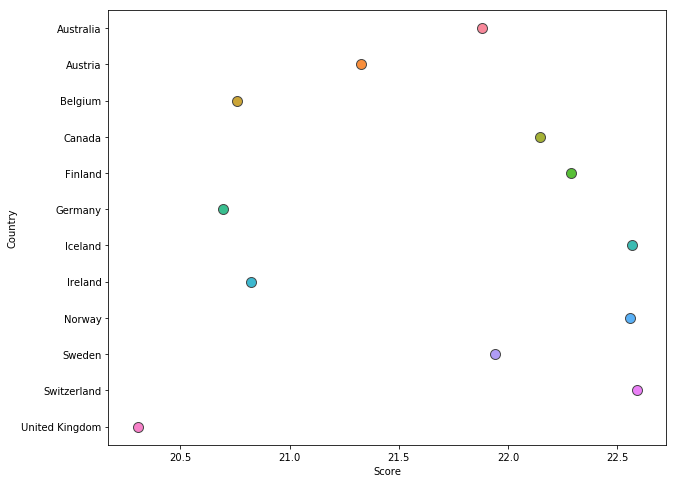

In [135]:
f,ax=plt.subplots(figsize=(10,8))
sbr.swarmplot(x=grpdata.loc["High","High","High","High"].Score,y=grpdata.loc["High","High","High","High"].Country,size=10,linewidth=1)
warnings.filterwarnings("ignore")

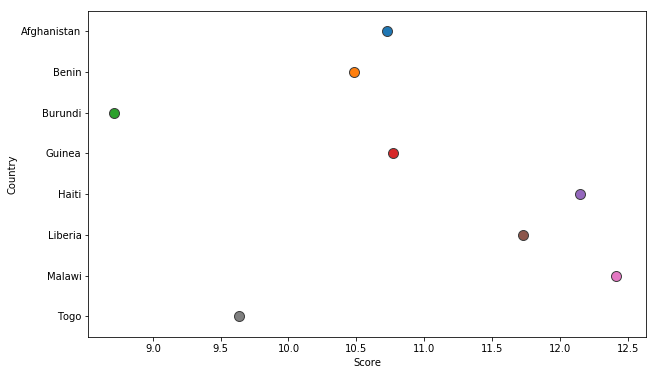

In [136]:
f,ax=plt.subplots(figsize=(10,6))
sbr.swarmplot(x=grpdata.loc["Low","Low","Low","Low"].Score,y=grpdata.loc["Low","Low","Low","Low"].Country,size=10,linewidth=1)
warnings.filterwarnings("ignore")

In [137]:
filter_eco=uni_data.Economy>sum(uni_data.Economy)/len(uni_data.Economy)
filter_health=uni_data.Health>sum(uni_data.Health)/len(uni_data.Health)
filter_trust=uni_data.Trust>sum(uni_data.Trust)/len(uni_data.Trust)
filter_family=uni_data.Family>sum(uni_data.Family)/len(uni_data.Family)
uni_data[filter_eco & filter_health & filter_trust & filter_family]

,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
2,Algeria,Middle East and Northern Africa,68,17.832,3.083814,3.057027,1.853285,0.729186,0.481496,0.218097,8.408734
6,Australia,Australia and New Zealand,10,21.881,4.262425,3.924032,2.626647,1.821217,0.980864,1.387389,6.878171
7,Austria,Western Europe,13,21.325,4.274707,3.840815,2.511398,1.735646,0.621300,0.976002,7.365136
9,Bahrain,Middle East and Northern Africa,49,18.265,4.252412,3.483320,2.057253,1.465417,0.820762,0.517758,5.668169
11,Belarus,Central and Eastern Europe,59,17.184,3.319098,3.727765,2.004834,0.965690,0.521784,0.405018,6.239953
12,Belgium,Western Europe,19,20.757,4.196991,3.800463,2.534352,1.637811,0.739223,0.696403,7.152600
18,Brazil,Latin America and Caribbean,16,20.570,3.176133,3.703556,1.927722,1.332194,0.427963,0.465850,9.536607
24,Canada,North America,5,22.147,4.245644,3.900059,2.567788,1.817771,0.930232,1.341990,7.343874
35,Denmark,Western Europe,3,22.575,4.249643,4.075442,2.462246,1.854797,1.328870,1.058380,7.545137
37,Ecuador,Latin America and Caribbean,48,17.959,2.837900,3.144939,2.162516,1.343638,0.501405,0.366262,7.603433


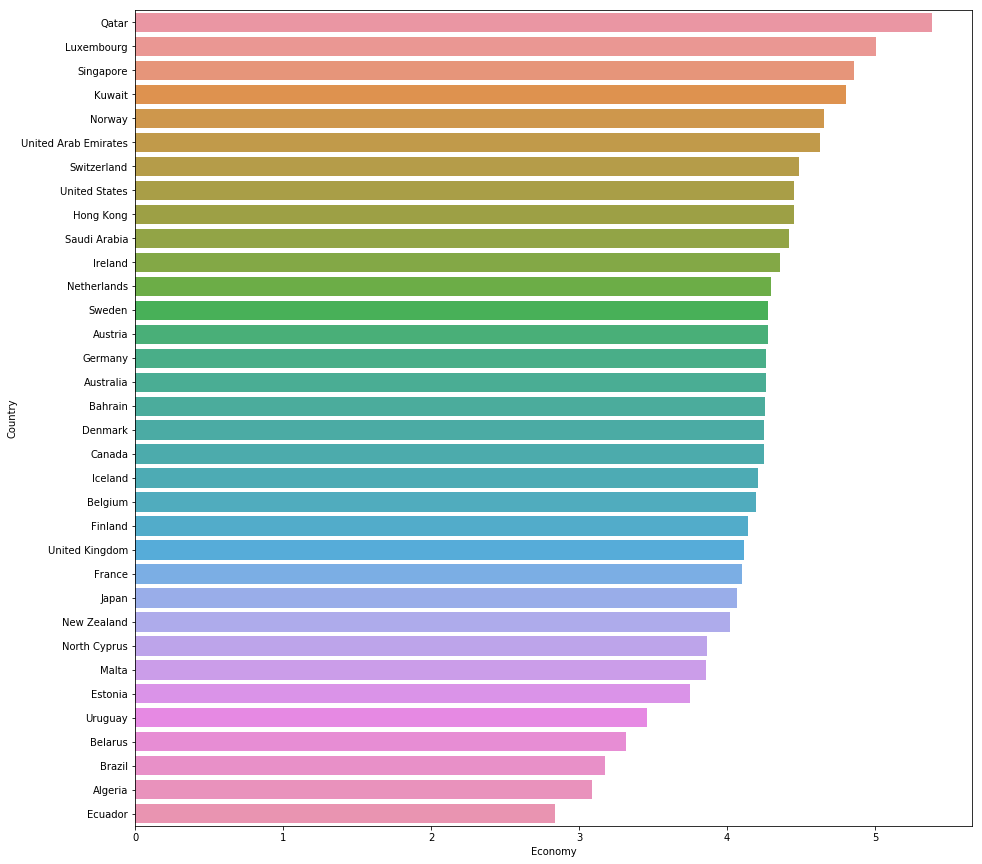

In [138]:
f,ax=plt.subplots(figsize=(15,15))
sbr.barplot(x="Economy",y="Country",data=uni_data[filter_eco & filter_health & filter_trust & filter_family].sort_values(by="Economy",ascending=False))
warnings.filterwarnings("ignore")

In [139]:
filter_eco2=uni_data.Economy<sum(uni_data.Economy)/len(uni_data.Economy)
filter_health2=uni_data.Health<sum(uni_data.Health)/len(uni_data.Health)
filter_trust2=uni_data.Trust<sum(uni_data.Trust)/len(uni_data.Trust)
filter_family2=uni_data.Family<sum(uni_data.Family)/len(uni_data.Family)
uni_data[filter_eco2 & filter_health2 & filter_trust2 & filter_family2]

,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Afghanistan,Southern Asia,153,10.729,1.103567,0.994763,0.657537,0.504620,0.229468,0.989651,6.248481
3,Angola,Sub-Saharan Africa,137,11.694,2.463518,2.628472,0.266609,0.109730,0.225280,0.342076,5.658462
10,Bangladesh,Southern Asia,109,13.945,1.525983,1.413682,1.664771,1.284337,0.375238,0.575795,7.105446
13,Benin,Sub-Saharan Africa,155,10.481,1.112725,0.893350,0.739310,1.307933,0.207839,0.592348,5.627031
20,Burkina Faso,Sub-Saharan Africa,152,11.358,0.928298,2.525700,0.700064,1.052998,0.373978,0.711865,5.065343
21,Burundi,Sub-Saharan Africa,157,8.715,0.175233,1.280084,0.533041,0.221601,0.278958,0.604605,5.620084
22,Cambodia,Southeastern Asia,145,11.894,1.618185,2.171098,1.465863,1.884356,0.221496,1.192903,3.340621
23,Cameroon,Sub-Saharan Africa,133,13.460,1.511775,2.459108,0.493892,1.350839,0.170427,0.669278,6.804156
25,Chad,Sub-Saharan Africa,149,11.366,1.202083,2.346256,0.229475,0.525422,0.155792,0.586644,6.320568
29,Congo (Brazzaville),Sub-Saharan Africa,139,12.516,2.258714,1.972934,0.882587,1.229066,0.294008,0.365502,5.512296


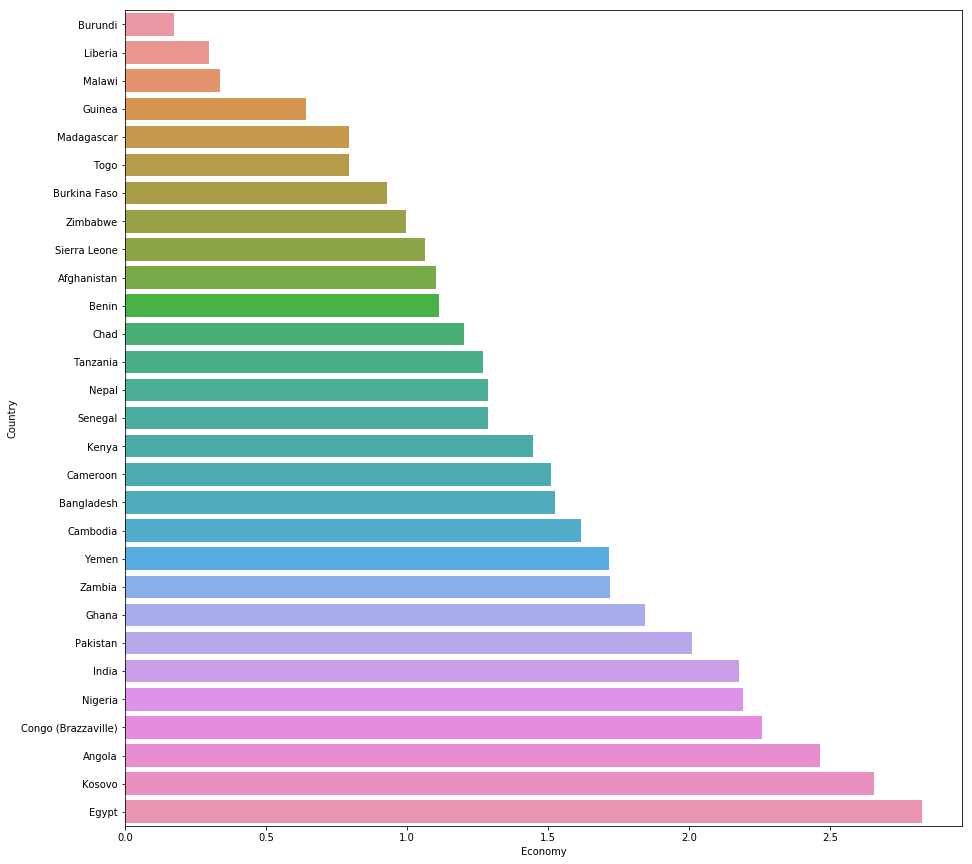

In [140]:
f,ax=plt.subplots(figsize=(15,15))
sbr.barplot(x="Economy",y="Country",data=uni_data[filter_eco2 & filter_health2 & filter_trust2 & filter_family2].sort_values(by="Economy"))
warnings.filterwarnings("ignore")

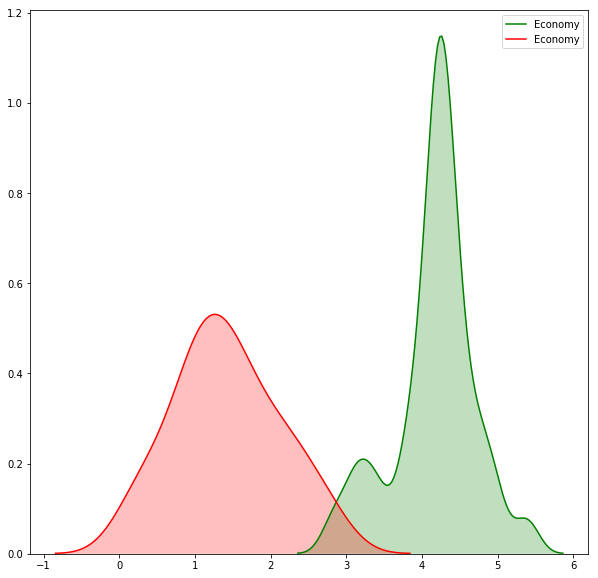

In [141]:
f,ax=plt.subplots(figsize=(10,10))
p1=sbr.kdeplot(uni_data[filter_eco & filter_health & filter_trust & filter_family].Economy,shade=True,color="g")
p1=sbr.kdeplot(uni_data[filter_eco2 & filter_health2 & filter_family2 & filter_trust2].Economy,shade=True,color="r")
warnings.filterwarnings("ignore")

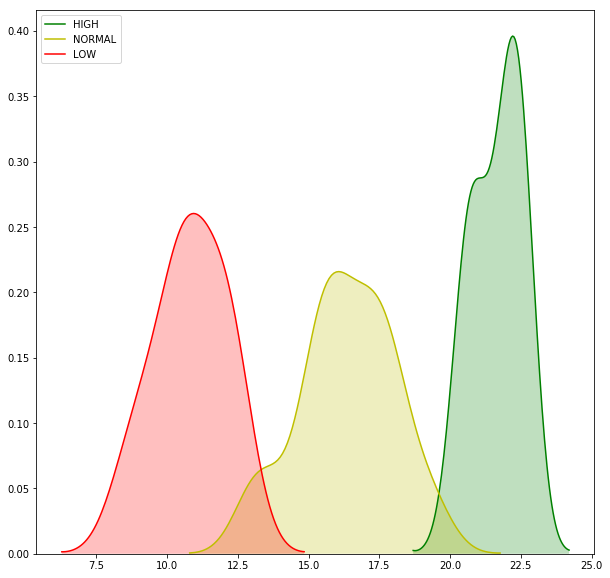

In [148]:
#Comparasion for three levels by Score
f,ax=plt.subplots(figsize=(10,10))
p2=sbr.kdeplot(grpdata.loc["High","High","High","High"].Score,color="g",shade=True, label="HIGH")
p2=sbr.kdeplot(grpdata.loc["Normal","Normal","Normal","Normal"].Score,color="y",shade=True, label="NORMAL")
p2=sbr.kdeplot(grpdata.loc["Low","Low","Low","Low"].Score,color="r",shade=True, label="LOW")
warnings.filterwarnings("ignore")

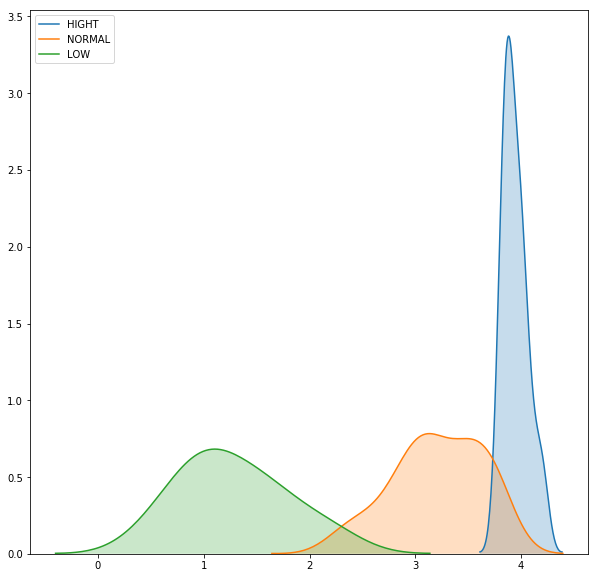

In [150]:
#Comparasion for three level by Family
f,ax=plt.subplots(figsize=(10,10))
plt3=sbr.kdeplot(grpdata.loc["High","High","High","High"].Family,shade=True, label ="HIGHT")
plt3=sbr.kdeplot(grpdata.loc["Normal","Normal","Normal","Normal"].Family,shade=True, label="NORMAL")
plt3=sbr.kdeplot(grpdata.loc["Low","Low","Low","Low"].Family,shade=True, label="LOW")
warnings.filterwarnings("ignore")

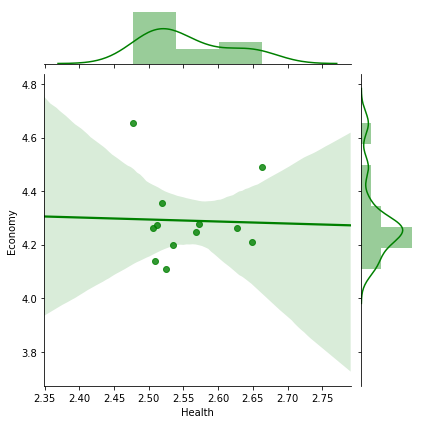

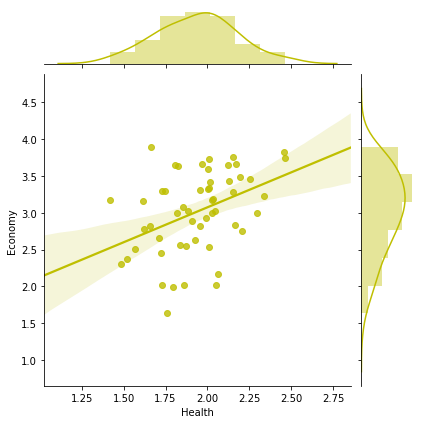

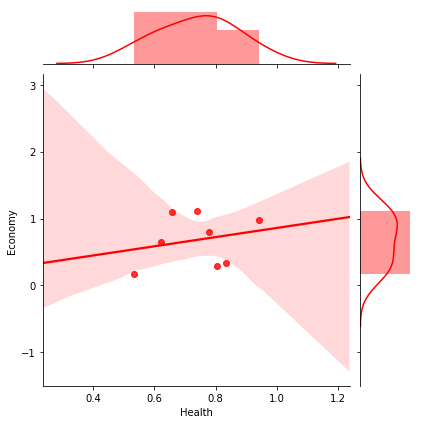

In [152]:
sbr.jointplot(x=grpdata.loc["High","High","High","High"].Health,y=grpdata.loc["High","High","High","High"].Economy,kind="reg",color="g")
sbr.jointplot(x=grpdata.loc["Normal","Normal","Normal","Normal"].Health,y=grpdata.loc["Normal","Normal","Normal","Normal"].Economy,kind="reg",color="y")
sbr.jointplot(x=grpdata.loc["Low","Low","Low","Low"].Health,y=grpdata.loc["Low","Low","Low","Low"].Economy,kind="reg",color="r")
warnings.filterwarnings("ignore")

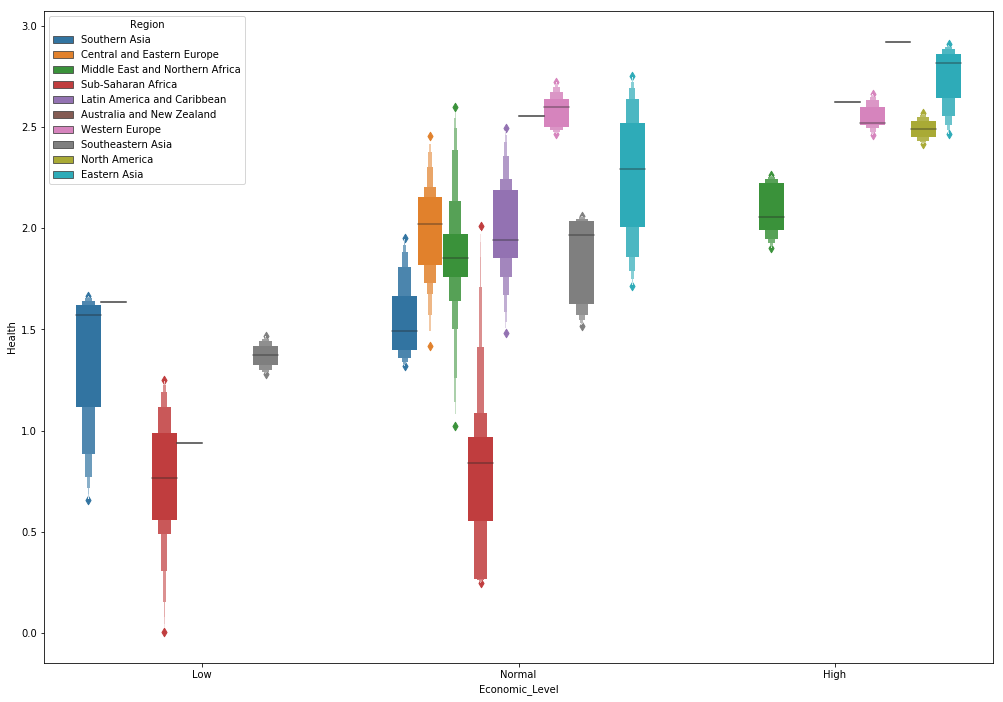

In [153]:
f,ax=plt.subplots(figsize=(17,12))
sbr.boxenplot(x="Economic_Level",y="Health",data=datamean,hue="Region")
warnings.filterwarnings("ignore")

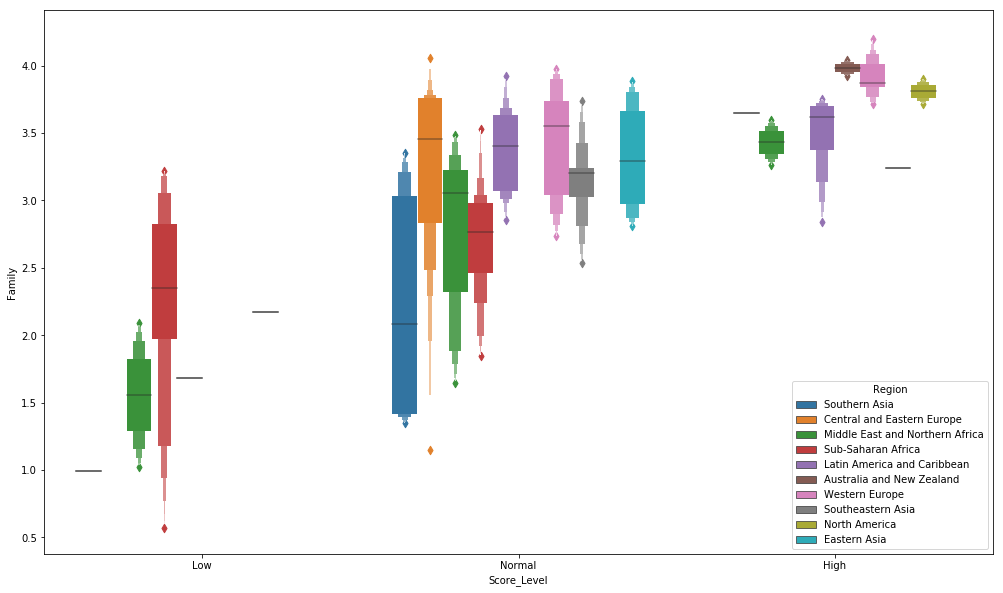

In [154]:
f,ax=plt.subplots(figsize=(17,10))
sbr.boxenplot(x="Score_Level",y="Family",data=datamean,hue="Region")
warnings.filterwarnings("ignore")